In [17]:
#the data is downloaded from the COVID 19 India patient statewise database https://api.covid19india.org/csv/latest/state_wise.csv
#the Statewise api has the total counts of confirmed, recovered and mortality cases
#this code computes  final statewise aggregates  and plots the final outcome of the confirmed cases.
#The outcomes possible are active,recovered or deaths
#The charts from this code is put up on my website @ https://sites.google.com/site/sohamdasgupta04
import matplotlib
import lmfit
import pandas as pd
import matplotlib.pyplot as plt
from lmfit.models import LorentzianModel, ExponentialModel, PowerLawModel
from numpy import linspace
plt.close('all')
from pprint import pprint
from datetime import timedelta, date

In [18]:
last_k = 10
df_india = pd.read_csv("state_wise.csv")
state='Karnataka'

Transform India data : Since we iterate over dates, it is easier to have dates as rows instead of columns 


In [19]:
def daterange(date1, date2):
    for n in range(int ((date2 - date1).days)+1):
        yield date1 + timedelta(n)

start_dt = date(2020, 3, 10)
end_dt = date(2020, 4, 10)
analysis_dates = []
for dt in daterange(start_dt, end_dt):
    analysis_dates.append(dt.strftime("%Y-%m-%d"))

In [20]:
df_india

,State,Confirmed,Recovered,Deaths,Active
0,Total,37257,10021,1223,26009
1,Maharashtra,11506,1879,485,9142
2,Gujarat,4721,736,236,3749
3,Delhi,3738,1167,61,2510
4,Madhya Pradesh,2715,524,145,2046
5,Rajasthan,2666,1116,62,1488
6,Tamil Nadu,2526,1312,28,1186
7,Uttar Pradesh,2328,654,42,1632
8,Andhra Pradesh,1463,403,33,1027
9,Telangana,1044,464,28,552


In [21]:
df_india_e = df_india[df_india.State == state]
ind_state = df_india_e.reset_index()
ind_state=ind_state.drop(columns=['Confirmed','State'])
ind_state

,index,Recovered,Deaths,Active
0,12,251,22,315


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


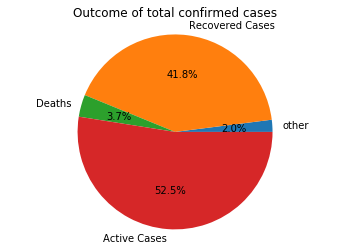

In [22]:
my_labels = 'other','Recovered Cases','Deaths','Active Cases'
plt.pie(ind_state,labels=my_labels,autopct='%1.1f%%')
plt.title('Outcome of total confirmed cases')
plt.axis('equal')
plt.savefig('Karnataka.jpeg')  
plt.show()